# **Week 7 Activity**

### Tasks

1. Read the data (CSV File) into python.
2. Check for null values.
3. Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ and comment on your observations.
4. Carry out correlation analysis on the dataset and find the correlation factor between 

    - ph and Chloramines 
    - ph and Conductivity

    What do we infer from this correlation value?

## T1. Read the data (CSV File) into python.

In [27]:
# NumPy Library as np
import numpy as np
# Pandas Library as 'pd'
import pandas as pd
# Matplot Library - PyPlot as plt
import matplotlib.pyplot as plt
# Seaborn Library as 'sns'
import seaborn as sns
# SciKit Learn library itself and pearsonr from it
import scipy
from scipy.stats import pearsonr

In [3]:
FL_DATA = pd.read_csv('Week_7_Activity_data.csv')
FL_DATA.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
1,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989
4,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
5,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562
6,7.360640,165.520797,32452.61441,7.550701,326.624353,425.383420,15.586810,78.740016,3.662292
7,7.119824,156.704993,18730.81365,3.606036,282.344050,347.715027,15.929536,79.500778,3.445756
8,6.347272,186.732881,41065.23476,9.629596,364.487687,516.743282,11.539781,75.071617,4.376348
9,9.181560,273.813807,24041.32628,6.904990,398.350517,477.974642,13.387341,71.457362,4.503661


In [34]:
FL_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
dtypes: float64(9)
memory usage: 141.5 KB


## T2. Check for null values.

In [12]:
FL_DATA.isna().sum().to_frame('Null value count')

,Null value count
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0


### Notes :
- No null values present in the Data.

## T3. Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ and comment on your observations.

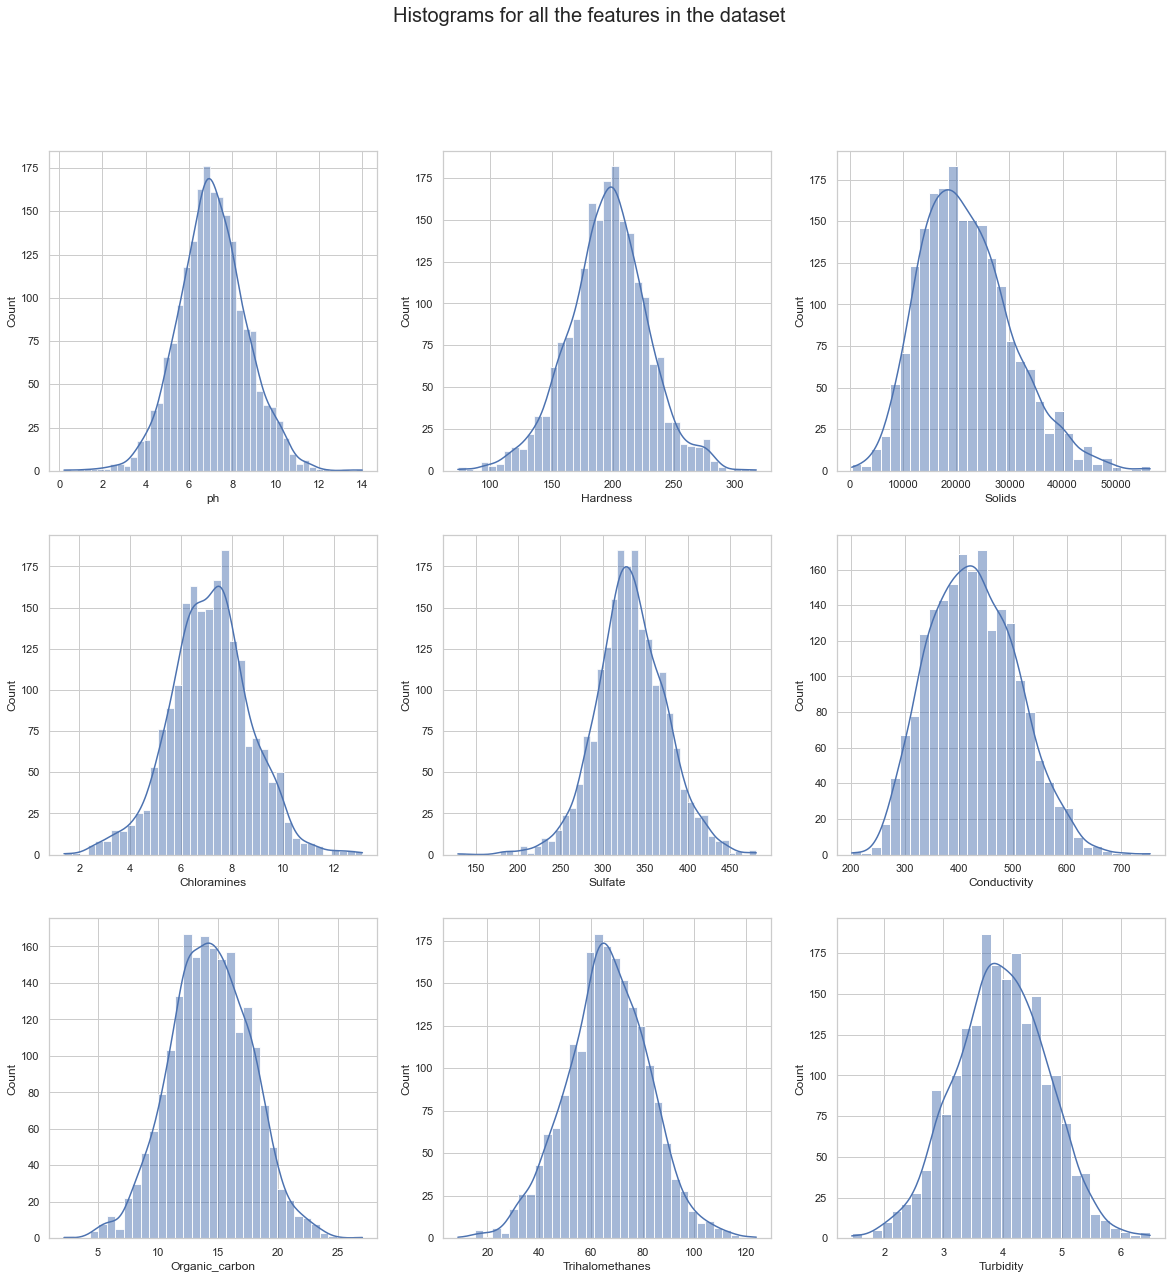

In [63]:
# select the columns to be plotted
cols = FL_DATA.columns.to_list()

# create the figure and axes
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# Setting the sns plot theme
sns.set_theme(style="whitegrid")

# Giving a plot title
fig.suptitle('Histograms for all the features in the dataset', fontsize=20)

# For making indexing easier, creating a contiguous flattened array
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.histplot(data=FL_DATA[col], kde=True, ax=ax)

plt.show()


In [64]:
FL_DATA.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [70]:
FL_DATA_01 = FL_DATA.drop(FL_DATA.columns[[0,2,3,5,7,8]] , axis=1)
FL_DATA_01.head(5)

,Hardness,Sulfate,Organic_carbon
0,214.373394,356.886136,18.436525
1,181.101509,310.135738,11.558279
2,188.313324,326.678363,8.399735
3,248.071735,393.663395,13.789695
4,203.361523,303.309771,12.363817


In [71]:
# Statistical aspects of Data
FL_DATA_01.describe()

,Hardness,Sulfate,Organic_carbon
count,2011.000000,2011.000000,2011.000000
mean,195.968072,333.224672,14.357709
std,32.635085,41.205172,3.324959
min,73.492234,129.000000,2.200000
25%,176.744938,307.632511,12.124105
50%,197.191839,332.232177,14.322019
75%,216.441070,359.330555,16.683049
max,317.338124,481.030642,27.006707


<AxesSubplot:>

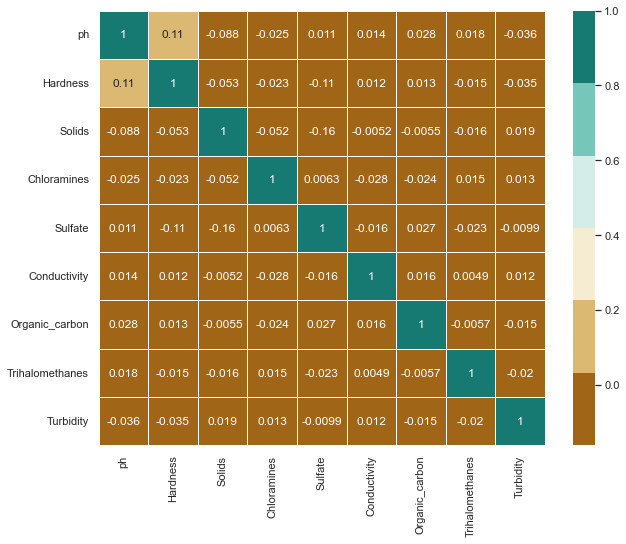

In [75]:
# Calculating the Correlation matrix using DataFrame.corr()
corrmatrix = FL_DATA.corr()
# Creating Heatmap using seaborn & Correlation matrix
plt.subplots(figsize=(10,8))
colormap = sns.color_palette('BrBG')
sns.heatmap(corrmatrix, annot=True, linewidth=0.75, cmap=colormap)

### Insights :
- As we can observe from the histogram, the skewness of three of these features indicates a symmetric distribution.
- But when we examine them by standard deviation, Organic_carbon shows much lesser SD of 3.324959 and rest of the two are in the range of 32-42.
- ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ doesn't have any influence with the rest of the features in the data. Their correlation coefficients always hover around zero and the relationship thus weaker.

## T4. Carry out correlation analysis on the dataset and find the correlation factor between 

- ph and Chloramines 
- ph and Conductivity

  What do we infer from this correlation value?

In [30]:
FL_DATA_02 = FL_DATA.drop(FL_DATA.columns[[1,2,4,6,7,8]] , axis=1)
FL_DATA_02.head()

,ph,Chloramines,Conductivity
0,8.316766,8.059332,363.266516
1,9.092223,6.546600,398.410813
2,5.584087,7.544869,280.467916
3,10.223862,7.513408,283.651634
4,8.635849,4.563009,474.607645


<AxesSubplot:>

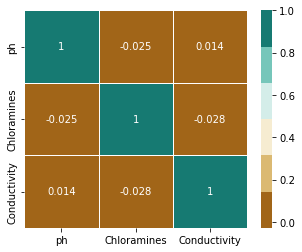

In [31]:
# Calculating the Correlation matrix using DataFrame.corr()
corrmatrix_01 = FL_DATA_02.corr()
# Creating Heatmap using seaborn & Correlation matrix
plt.subplots(figsize=(5,4))
colormap = sns.color_palette('BrBG')
sns.heatmap(corrmatrix_01, annot=True, linewidth=0.75, cmap=colormap)

### a. ph and Chloramines

In [38]:
# Using PearsonR Correlation coefficient
pearsonr_coefficient, p_value = pearsonr(FL_DATA_02.ph, FL_DATA_02.Chloramines)
print('Pearson Correlation Coefficient of ph vs Chloramines is %0.4f'% (pearsonr_coefficient))

Pearson Correlation Coefficient of ph vs Chloramines is -0.0248


### b. ph and Conductivity

In [40]:
pearsonr_coefficient_01, p_value_01 = pearsonr(FL_DATA_02.ph, FL_DATA_02.Conductivity)
print('Pearson Correlation Coefficient of ph vs Conductivity is %0.4f'% (pearsonr_coefficient_01))

Pearson Correlation Coefficient of ph vs Conductivity is 0.0141


### Insights :
- Both of these pairs have a weaker relationship, because the calculated Pearson Correlation Coefficients are -0.0248 & 0.0141 respectively.
- When we analyse the whole data, ph shows a much stronger relationship with Hardness.
- Changing the acidity values may not result a noticable change in the Chloramine content in the fluid and it is also applicable to electrical conductivity of the fluid. But it may influence the hardness value of fluid because of a stronger positive correlation with Acidity.